In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
import seaborn as sns

In [3]:
import lifelines

In [4]:
import numpy as np

In [5]:
df = pd.read_csv("lung cancer (1).csv")

In [6]:
df.head()

,Treatment,Cell type,Survival,Status,Karnofsky_score,Dmonths,Age,Prior_therapy
0,1,1,72,1,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10


In [7]:
df.tail()

,Treatment,Cell type,Survival,Status,Karnofsky_score,Dmonths,Age,Prior_therapy
133,2,4,111,1,60,5,64,0
134,2,4,231,1,70,18,67,10
135,2,4,378,1,80,4,65,0
136,2,4,49,1,30,3,37,0
137,2,4,49,1,30,3,37,0


In [8]:
df.profile_report()

In [9]:
df.isnull().sum()

Treatment           0
Cell type           0
Survival            0
Status              0
 Karnofsky_score    0
Dmonths             0
Age                 0
Prior_therapy       0
dtype: int64

LinAlgError: singular matrix

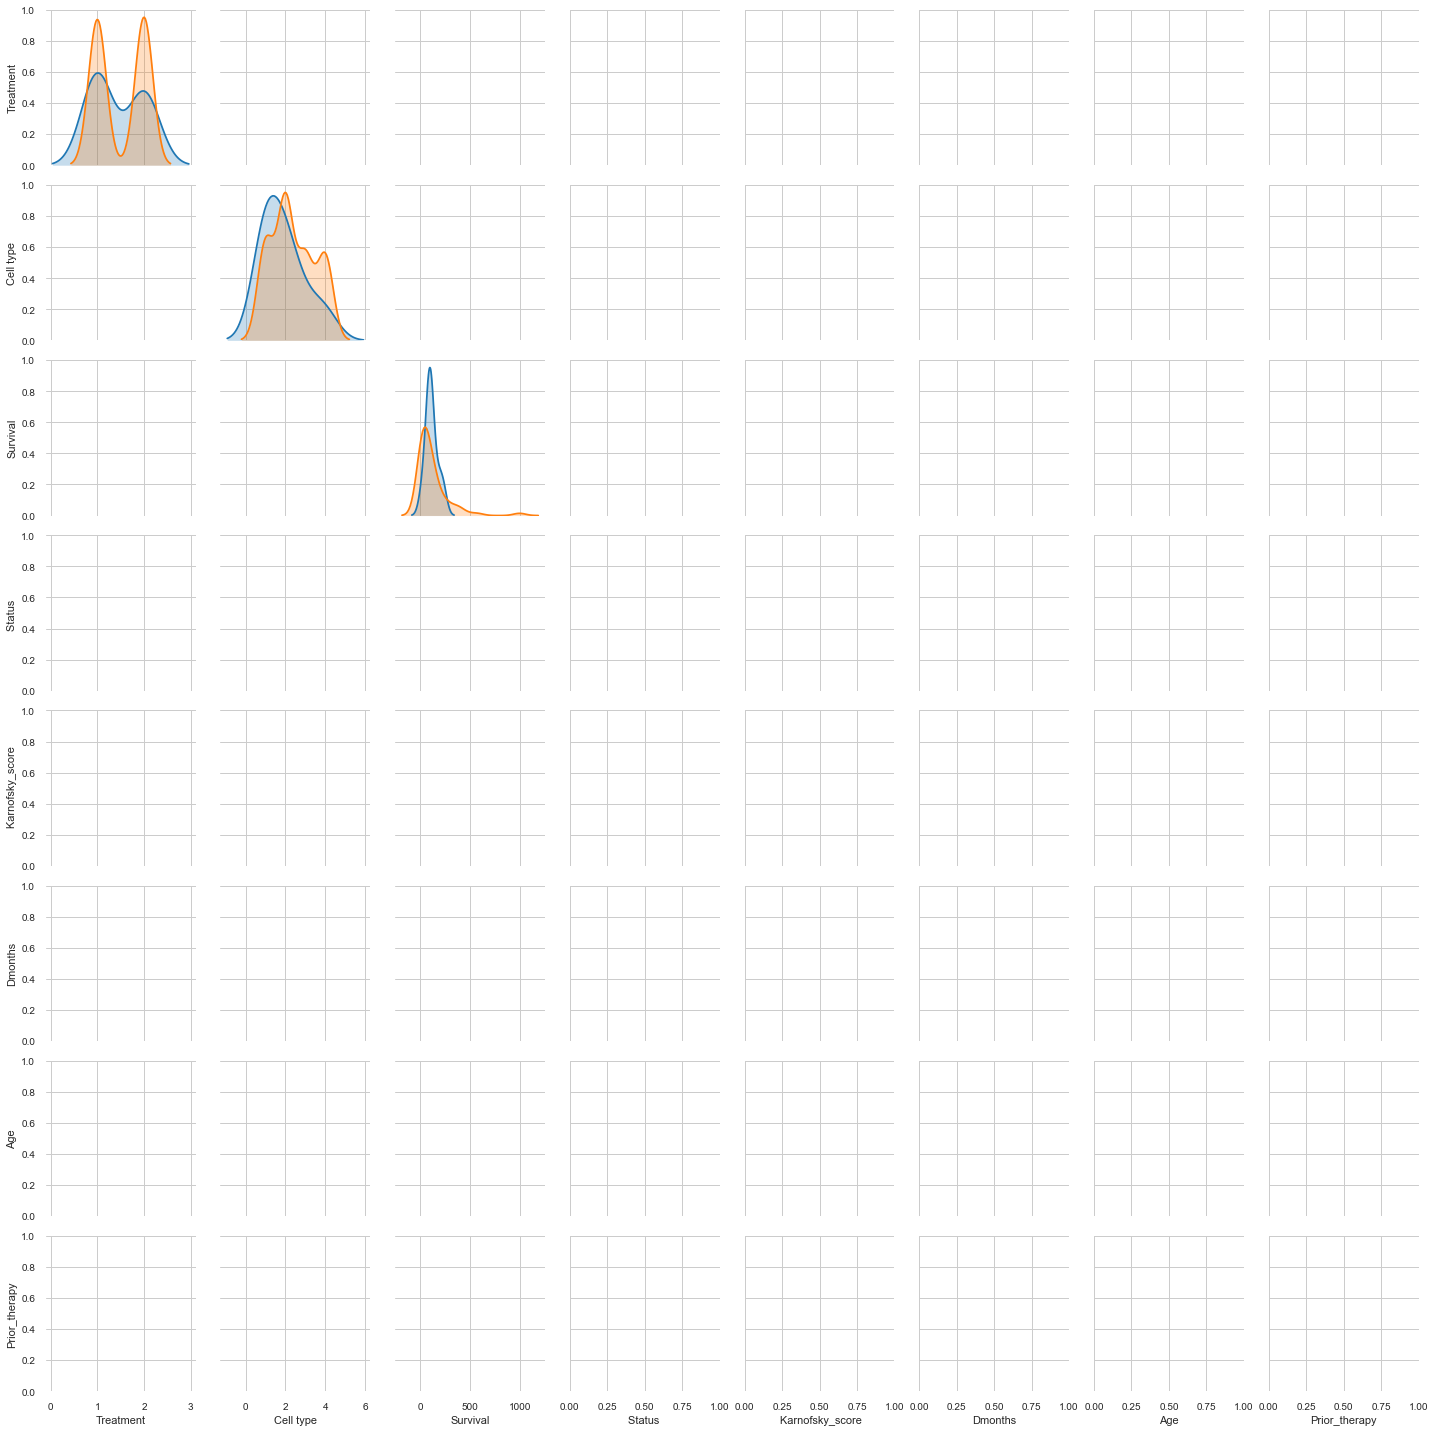

In [11]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue='Status ')

plt.show()

In [ ]:
sns.FacetGrid(df,hue="Status",size=5)\
    .map(sns.distplot,"Survival")\
    .add_legend()
plt.show()

In [12]:
from lifelines import KaplanMeierFitter

In [13]:
durations = df["Age"]

In [14]:
event_observed = df[" Karnofsky_score"]

In [15]:
kmf = KaplanMeierFitter()

In [16]:
kmf.fit(durations,event_observed,label=" Karnofsky_score")

<lifelines.KaplanMeierFitter:" Karnofsky_score", fitted with 138 total observations, 0 right-censored observations>

<AxesSubplot:xlabel='timeline'>

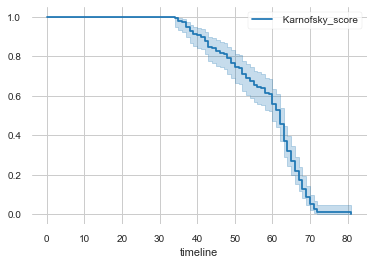

In [17]:
kmf.plot() #proability of treatment effect on survival time

In [19]:
from lifelines import CoxPHFitter

In [20]:
cph = CoxPHFitter()
cph.fit(df, 'Dmonths', event_col='Treatment')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 138 total observations, 0 right-censored observations>
             duration col = 'Dmonths'
                event col = 'Treatment'
      baseline estimation = breslow
   number of observations = 138
number of events observed = 138
   partial log-likelihood = -527.41
         time fit was run = 2020-10-01 07:41:00 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
Cell type          0.12       1.13       0.08            -0.04             0.28                 0.96                 1.32
Survival           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Status            -0.47       0.62       0.37            -1.19             0.24                 0.31                 1.28
 Karnofsky_score   0.01       1.01       0.00            -0.00             0.02                 1.00                 1.02
Age                0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
Prior_therapy     -0.10       0.90       0.02            -0.14            -0.06                 0.87                 0.94
                     z      p   -log2(p)
covariate                               
Cell type         1.50   0.13       2.90
Survival          0.17   0.86       0.21
Status           -1.29   0.20       2.35
 Karnofsky_score  1.30   0.19       2.38
Age               0.26   0.79       0.34
Prior_therapy    -5.15 <0.005      21.89
---
Concordance = 0.67
Partial AIC = 1066.82
log-likelihood ratio test = 35.87 on 6 df
-log2(p) of ll-ratio test = 18.38

In [ ]:
cph.plot()

In [18]:
kmf1 = KaplanMeierFitter()

In [21]:
T = df['Survival']

In [22]:
E = df["Prior_therapy"]

In [23]:
groups = df["Treatment"]

In [24]:
i1 = (groups == 1)

In [25]:
i2 = (groups == 2)

In [26]:
kmf1.fit(T[i1],E[i1],label="treatment starndard ")

<lifelines.KaplanMeierFitter:"treatment starndard ", fitted with 69 total observations, 48 right-censored observations>

<AxesSubplot:xlabel='timeline'>

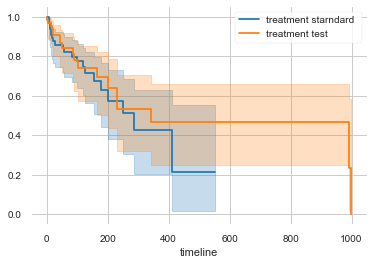

In [27]:
a1 = kmf1.plot()
kmf1.fit(T[i2],E[i2],label = 'treatment test')
kmf1.plot(ax=a1)

In [28]:
groups2 = df['Status ']
j1 = (groups2 == 1)
j2 = (groups2 == 0)


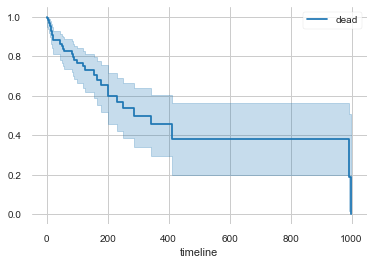

In [29]:
kmf1.fit(T[j1],E[j1],label="dead")
b1 = kmf1.plot()

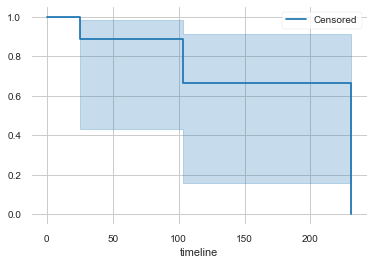

In [30]:
kmf1.fit(T[j2],E[j2],label="Censored")
b2 = kmf1.plot()